In [2501]:
import numpy as np
import matplotlib.pyplot as plt

In [2502]:
# modelling the arrival process

# per second converyor belt

conveyor1=1
# c1 uses the distribution that tells us how likely the time of the next arrival
# a random value. 
conveyor2=2/3

stationFailrate=0.01
stationmean=1/stationFailrate

In [2503]:
# Exponential Random Number Algorithm
def poisson_est(mean):
    r=np.exp(-mean)
    N=0.0
    s=1.0
    s*=np.random.random()
    while s>r:
        N+=1
        s*=np.random.random()
    else:
        return N

In [2504]:
# total number of entities conveyor1 delivers per second for 1000 seconds
c1sample=[poisson_est(1)  for i in range(1000)]


In [2505]:
# total entities conveyor belt delivers
totalc1=sum(c1sample)
totalc1

988.0

In [2506]:
def conveyor2(time):
    # number of entities conveyor2 delivers over a given time
    return (int(time/1.5))
conveyor2(1000)

666

In [2507]:
def failtime(frate,time):
    # per unit time
    time=time%100
    # cdf of failure 
    c_fail=1 - np.exp(-frate* time)
    if(c_fail>=np.random.random()):
        return time
    else: 
        return 0    

In [2508]:
def failnow(frate,time):
    # prob of failure in next second
    p_fail=frate*np.exp(-frate*0)+ frate*np.exp(-frate*1)

    if(p_fail>=np.random.random()):
        return time
    else: 
        return 0 

In [2509]:
f=np.array([failnow(0.01,time) for time in range(10000)])
(10000-sum(f==0)) /10000
# failtime=
f[f!=0]



array([  95,  168,  297,  329,  346,  350,  358,  360,  373,  447,  503,
        565,  569,  606,  655,  664,  742,  767,  768,  778,  852,  854,
        868,  876,  882,  899,  915, 1004, 1006, 1060, 1098, 1100, 1228,
       1238, 1279, 1394, 1409, 1446, 1467, 1530, 1577, 1595, 1597, 1632,
       1656, 1795, 1810, 1829, 1834, 1876, 1928, 2014, 2092, 2182, 2249,
       2262, 2298, 2433, 2460, 2581, 2629, 2648, 2852, 2866, 2996, 3013,
       3080, 3122, 3214, 3220, 3316, 3423, 3577, 3587, 3707, 3764, 3797,
       3820, 3841, 3954, 3961, 3965, 3967, 3982, 4091, 4343, 4355, 4437,
       4469, 4479, 4634, 4660, 4809, 4875, 4975, 5017, 5041, 5075, 5088,
       5163, 5176, 5241, 5292, 5498, 5582, 5592, 5593, 5616, 5698, 5733,
       5784, 5791, 5851, 5905, 5931, 6049, 6226, 6397, 6556, 6572, 6594,
       6687, 6763, 6786, 6794, 6910, 6939, 6950, 6962, 7039, 7108, 7153,
       7241, 7263, 7296, 7309, 7349, 7377, 7440, 7643, 7704, 7721, 7814,
       7856, 7903, 8093, 8097, 8133, 8246, 8315, 83

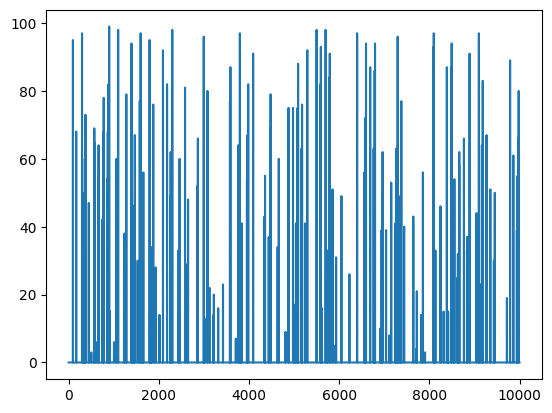

In [2510]:
f=f%100
plt.plot(np.arange(0,10000),f)

In [2511]:
# for each second, check the 
def simulate(time):
    C1event=[]
    stationFailures=[]
    completed=0
    downtime=0
    # stacks to count waiting entities at each conveyour belt C
    stackC1=[]
    stackC2=[]
    def stackpop(stackC1,stackC2):
        if stackC2[-1]==1:
            stackC2.pop()
        else:
            stackC2[-1]-=1 
        
        if stackC1[-1]==1:
            stackC1.pop() 
        else:
            stackC1[-1]==1
            
    def addtoC1(time_index,stackC1,C1event):
            if len(stackC1)==0:
                stackC1.append(C1event[time_index])
            else:
                stackC1.append(C1event[time_index]+stackC1[-1])

    # add a entity to the stack every 1.5 seconds
    def addtoC2(time_index,stackC2):
        if (time_index==0):pass
        if time_index%1.5==0:
            if len(stackC2)==0:
                stackC2.append(1)
            else:
                stackC2.append(stackC2[-1]+1)


# simulate events with respect to random variables
    for t in np.arange(time):
        C1event.append(poisson_est(1))
        stationFailures.append(failnow(0.01,t))

    for time_index in np.arange(time):
        
        addtoC1(time_index,stackC1,C1event)
        addtoC2(time_index,stackC2)

        # if both parts are ready
        if stackC1 and stackC2 and stackC1[-1]>0 and stackC2[-1]>0:
            # check if the machine is working
            if stationFailures[time_index]>0:
                for standyby in range(1,6):
                    curr=standyby+time_index
                    # conveyors run during downtime
                    addtoC1(curr,stackC1,C1event)
                    addtoC2(curr,stackC2)
                downtime+=5
                # machine fails close to the end of the testing time
                if time_index+5>=time-1:
                    return completed

                # count continues 5 seconds after
                time_index+=5
                stackpop(stackC1,stackC2)
            
                completed+=1
            else: #if the machine is working
                # do this or a while loop - while there are parts
                stackpop(stackC1,stackC2)
                completed+=1
        # print("\npost\nstackc2",stackC2,"\nstackc1",stackC1,'\ntime',time_index,'\n',completed,'\n\n')
    return completed,downtime

In [2512]:
simulate(100)

(34, 0)

In [2513]:
# will station1 do all work available instantly or one per unit time, while loop or one per iteration
# can parts + downtime> total time
# end behavior, produce or no